# Report 3

## Introduction

The Japanese Automaker Toyota has been the highest selling automaker in the United States since 2012.[3] As a driver of a Toyota Highlander, I decided to compare the safety of my car to the other vehicles produced by Toyota. Safety rating is a rather important factor for many car buyers in determining whether to buy a vehicle or not. The safety rating cannot be obtained through this dataset, but a fair means of rating the safety can be obtained. This is achieved through determining how many vehicle complaints are car accident related and how many vehicles of that model were sold, which can give us a ratio for how many sold vehicles were in a car accident, with regards to the complaints. I also attempt to establish a correlation for a vehicles propensity to get into car accidents.

Along with that topic, I decided to take a deeper dive into the Toyota Highlander to better understand what makes Haley the Highlander, my Highlander, tick-tock. I attribute it's car accidents to weak breaking systems, but this study shall reveal some more findings.

## Code

Here I import my first packages and create a dictionary to use for storing the information from the complaint system.

In [239]:
import requests
import json
url0 = 'http://www.nhtsa.gov/webapi/api/Complaints/vehicle/modelyear/{}/make/{}/model/{}?format=json'

make = 'Toyota'
models = sorted(['Highlander', 'Avalon', 'Camry', 'Corolla', 'Prius', 'Yaris', 
                'RAV4', 'Sienna', '4Runner', 'Sequoia', 'Land Cruiser', 'Tacoma', 'Tundra'])

d = dict()
for model in models:
    d[model] = {}
    for year in range(2000,2019):
            url = url0.format(year,make,model)
            print(str(year)+'\r',end='')
            s = requests.get(url).text  # a JSON string
            complaints = json.loads(s)
            d[model]['crashes'] = [complaints['Results'][x]['Crash'] for x in range(len(complaints['Results']))]
            d[model][year] = complaints['Count']

I decided to write an enumerator to make it easier to count how many complaints came from crash related complaints. Upon further inspection, I may not need to import enum.

In [240]:
#from enum import Enum

def YN(Enum):
    if Enum == 'Yes':
        return 1
    else: return 0

Now I utilize the method to enumerate the crash complaints and summate the complaints to find the total number of crash related complaints.

In [241]:
for model in models:
    for crash in range(len(d[model]['crashes'])):
        d[model]['crashes'][crash] = YN(d[model]['crashes'][crash])
    d[model]['crashes'] = sum(d[model]['crashes'])

The list of cars was retrieved from best-selling-cars.com.[2] I only used the cars that returned more than 100 complaints

I decided to create a dictionary to hold the total number of complaints for each vehicle.

In [243]:
total_complaints = {}

for model in d:
    total_complaints[model] = sum(list(d[model].values()))
    
total_complaints = dict(sorted( total_complaints.items(), key = lambda dict: dict[1] ))
print(total_complaints)

{'Land Cruiser': 106, 'Yaris': 709, 'Avalon': 2473, 'Sequoia': 2767, '4Runner': 2840, 'Highlander': 2922, 'Tundra': 4427, 'RAV4': 5341, 'Tacoma': 5391, 'Sienna': 7258, 'Corolla': 8526, 'Prius': 10582, 'Camry': 11102}


In descending order, Toyota's top selling vehicles in 2018 were the RAV4, Camry, Corolla, Tacoma, Highlander, Tundra, Sienna, Prius, 4Runner, Yaris, Sequoia, Avalon, and Land Cruiser. It shows that there may be no direct correlation as to whether the popularity of a vehicle has to do with the customer satisfaction, but it also shows that the more vehicles that are sold, the more complaints there will be.

In [244]:
import altair as alt
alt.renderers.enable('notebook')
import pandas as pd

After importing altair and pandas, I can use these two libraries to plot bar charts. These depict the number of complaints per vehicle.

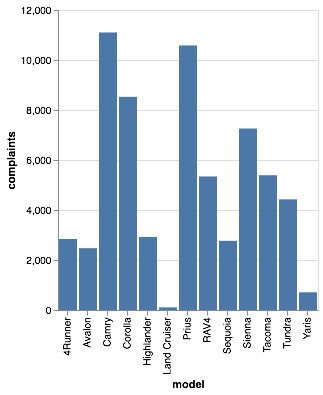

In [245]:
car_complaints = pd.DataFrame.from_dict({'model': list(total_complaints.keys()), 'complaints': list(total_complaints.values())})
alt.Chart(car_complaints).mark_bar().encode( x='model:O', y='complaints' )

The chart above shows that the more popular cars tended to have more complaints. This does not imply that less popular cars have less problems or that more popular cars will have more problems. For instance, the Highlander has less complaints than the Tundra but likewise had more units sold. We can also see that the Sienna has a siginificantly higher proportionality of complaints even though less units have been sold over time. 

In [235]:
for model in models:
    d[model]['percentage of complaints from crashes'] = d[model]['crashes'] / total_complaints[model] * 100

Another use for the bar chart is to show the percentage of complaints that stemmed from crashes for each vehicle.

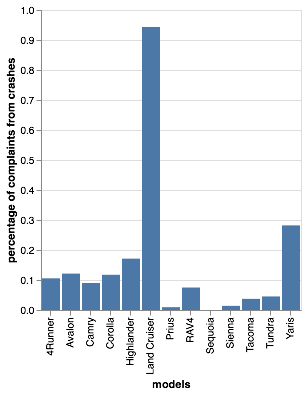

In [236]:
df2 = pd.DataFrame.from_dict({'models' : list(d.keys()),
                             'percentage of complaints from crashes' : list(d[model]['percentage of complaints from crashes'] for model in models)})
alt.Chart(df2).mark_bar().encode( x='models:O', y='percentage of complaints from crashes' )

The Land Cruiser seems to have a higher percentage of crash related complaints to total complaints due to the fact that there was a relatively low number of complaints (106) and only one car crash. There seems to be no correlation between size of car and propensity to have a crash complaint aside from trucks having a very low propensities for crashing.

Additionally, I decided to check the statistics on my own car, a 2008 Toyota Highlander, due to the fact that it seemed to have a higher propensity for crashes when compared to other large vehicles. Personally, I believe this to be due to the fact that it is a sports SUV. I created a bar chart to exhibit the number of crash related complaints over the years.

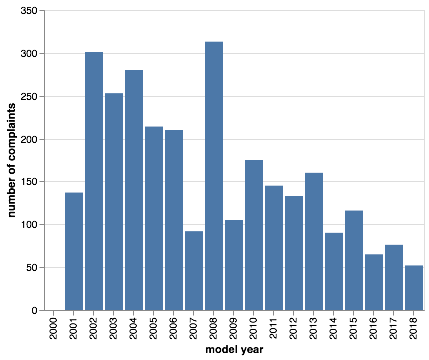

In [230]:
df = pd.DataFrame.from_dict(
    {'model year': list(d['Highlander'].keys())[1:-1],
     'number of complaints': (list(d['Highlander'].values())[1:-1])}
)
alt.Chart(df).mark_bar().encode( x='model year:O', y='number of complaints')

It's not a welcoming sign when you see that your car model has the most crash related complaints compared to the rest of it's years. I believe that there were spikes in 2002 and 2008 due to the fact that these were the years after the Highlander was updated ( new versions were released ).[1] Being that those are the years after new models are released, there was enough time for the cars to gain more popularity amongst consumers. This may also explain the decline in complaints post-spikes.

In [231]:
sales = [86699,113134,120174,133077,137409,129794,127878,104661,83118,
         92121,101252,121054,127572,146127,158915,191379,215775,244511]

In [ ]:
My last step was to calculate the total number of sales for the Highlander and decide how muh

In [232]:
yearly_sales = {}
for o in range(0,10):
    yearly_sales['200'+ str(o)] = sales[o]
for o in range(10,18):
    yearly_sales['20'+ str(o)] = sales[o]

In [233]:
crashes_to_sales = count/sum(yearly_sales.values())

In [234]:
crashes_to_sales

8.214733123857639e-07

so approximately .00000082147 percent of sales resulted to crash related complaints, if we use strictly complaints to measure and not reports.

# Conclusion

This study has revealed a method through which one may measure the consumer happiness with their automobiles. This is by using the number of complaints written compared to the number of units sold. Although this is not the final solution, it certainly offers a possible way to measure consumer happiness. The smaller the ratio of complaints to units sold, the more likely Toyota will be to have more happy drivers.

It's become apparent to me, due to the consistency of tables, that the safest vehicles tend to be the slower vehicles. Trucks such as the Tacoma, Tundra, and Sequoia tend to have much lower propensities for car crash related incidents as opposed to Camrys and Corollas, which are sedans. As a scholar who has taken two physics classes (*shocked emoji face*), I believe this to be due to the fact that the trucks can handle more force from the impact. So as weight goes to infinity, car crash complaints tend towards 0.

As far as the Toyota Highlander is concerned, I found that there is a relatively small number of vehicles that have as many complaints related to car accidents, proportionally, as the Highlander. I feel that this may be one reason for the increase of popularity in the model. In terms of safety, it seems to be one of the safer vehicles to drive, however, when compared to the other vehicles close to it's size, the Highlander is less durable. I found that there was an increase in complaints the year after a new model was released. I gather that this may be due to the fact that the vehicle has not had ample road time and testing. Perhaps this is due to the fact that the release was rushed. Finally, according to the tables, the Highlander may be the least prepared motor vehicle for car accidents, after the Yaris. This conclusion may be derived from the fact that the ratio for car crash related complaints to total complaints was larger than the ratios for the other vehicles aside from the Yaris and Land Cruiser. However, I label the Land Cruiser as an outlier due to the fact that there is such a small number of complaints for it. There was still a rather minute percent of vehicles that had led to crash related complaints in regards to the Highlander. 

Toyota has been growing as a company and I feel that it's customer satisfaction and strong desire for safety are the factors driving its growth.

# References

[1] <i> Toyota Highlander US car sales </i>. http://carsalesbase.com/us-car-sales-data/toyota/toyota-highlander/. Accessed October 10, 2019.

[2] <i>Toyota North America and Lexus Sales</i>. Henk Bekker. January 5, 2019. 
https://www.best-selling-cars.com/brands/2018-full-year-usa-toyota-north-america-and-lexus-sales/. Accessed October 10, 2019.

[3] <i> List of Manufacturers by Motor Vehicle Production. </i> https://en.wikipedia.org/wiki/List_of_manufacturers_by_motor_vehicle_production#2017. Accessed October 11, 2019.